<a href="https://colab.research.google.com/github/nikiema-marius/dianostics_by_IA_new/blob/reseaux_neurone/reseau_neurone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dianostics des maladies a l'aide des reseaux de neuronnes**

In [3]:
#pip install --upgrade tensorflow

In [4]:
#on commmence d'abord par importer toutes les biblotheques

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


print('*** importation des biblotheque terminées ')

*** importation des biblotheque terminées 


In [5]:
df = pd.read_csv('data/dataset.csv') # ce dataset contient les maladies leurs symptomes
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


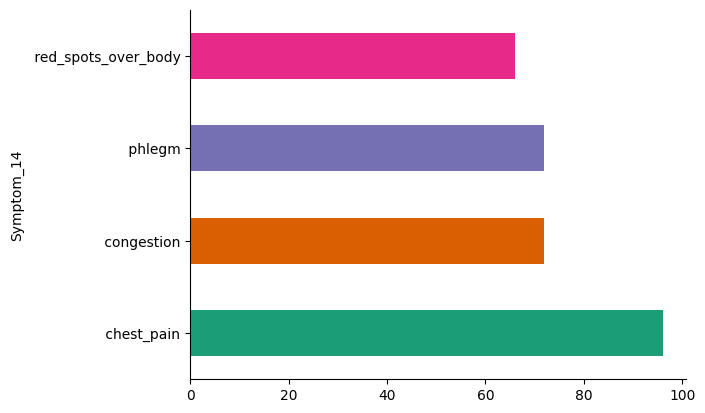

In [6]:
# @title Symptom_14

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Symptom_14').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df.describe() # quelques caracteristique de notre dataset

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


quelque stastistique de nos données

In [8]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isna().sum() # le nombre de données null
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [10]:
#remplir les données NaN ou null par zero(0)
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df1 = pd.read_csv('data/Symptom-severity.csv') # chargement de la data cette donné ordonne les symptomes et leur niveau de gravité
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [12]:
df1['Symptom'].unique() #listé les symptomes de facon unique
#df1.count()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [13]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


cette section est de remplacer les differents symptomes par leur poids qui se trouvent dans le fichier Symptom-severity.csv

In [14]:
d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   int64 
 2   Symptom_2   4920 non-null   int64 
 3   Symptom_3   4920 non-null   int64 
 4   Symptom_4   4920 non-null   int64 
 5   Symptom_5   4920 non-null   int64 
 6   Symptom_6   4920 non-null   int64 
 7   Symptom_7   4920 non-null   int64 
 8   Symptom_8   4920 non-null   int64 
 9   Symptom_9   4920 non-null   int64 
 10  Symptom_10  4920 non-null   int64 
 11  Symptom_11  4920 non-null   int64 
 12  Symptom_12  4920 non-null   int64 
 13  Symptom_13  4920 non-null   int64 
 14  Symptom_14  4920 non-null   int64 
 15  Symptom_15  4920 non-null   int64 
 16  Symptom_16  4920 non-null   int64 
 17  Symptom_17  4920 non-null   int64 
dtypes: int64(17), object(1)
memory usage: 692.0+ KB


In [97]:
#nous avons converti nos données en float parceque notre reseau neurone fonctionne avec des floats
X = df.drop('Disease',axis =1).astype(float)
y = df['Disease']


ici on decoupe nos donne en effet le X contient les sypmtomes et le y contient les maladies

In [68]:
print(X)

      Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0           1.0        3.0        4.0        0.0        0.0        0.0   
1           3.0        4.0        0.0        0.0        0.0        0.0   
2           1.0        4.0        0.0        0.0        0.0        0.0   
3           1.0        3.0        0.0        0.0        0.0        0.0   
4           1.0        3.0        4.0        0.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
4915        5.0        3.0        5.0        6.0        4.0        4.0   
4916        3.0        2.0        2.0        2.0        0.0        0.0   
4917        6.0        4.0        0.0        6.0        0.0        0.0   
4918        3.0        3.0        3.0        2.0        2.0        2.0   
4919        3.0        7.0        4.0        2.0        3.0        0.0   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0           0.0        0.0        

In [69]:
X.values

array([[1., 3., 4., ..., 0., 0., 0.],
       [3., 4., 0., ..., 0., 0., 0.],
       [1., 4., 0., ..., 0., 0., 0.],
       ...,
       [6., 4., 0., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       [3., 7., 4., ..., 0., 0., 0.]])

In [70]:
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: Disease, dtype: object

**Création d'ensembles de données d'entraînement et de test**

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


In [98]:
#ici nous avons convertir nos données qui etait sous forme de donné pandas en donné numpy car le model fonction avec les tableaux
X_train_numpy = X_train.values
y_train_numpy = y_train.values


In [80]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoder les noms de maladies en nombres
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_numpy)

# Appliquer l'encodage one-hot
onehot_encoder = OneHotEncoder(sparse=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))

# Assurez-vous que l'encodage one-hot a été effectué avec succès
print("y_train_onehot :", y_train_onehot)

# Assurez-vous que les formes correspondent
print("Forme de y_train_onehot :", y_train_onehot.shape)


y_train_onehot : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Forme de y_train_onehot : (3936, 41)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Nos données de sorties sont les maladies qui sont en chaine de caratères alors il va falloir les transformés en nombre alors nous utilisons l'encoder de sklearn

**Construire un réseau neuronal à une seule couche**:
une seule couche afin de voire le comportenant de notre reseau

In [81]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Fixer la graine aléatoire pour la reproductibilité
tf.random.set_seed(42)

# Création du modèle
model_1 = Sequential([
    Dense(10, activation='relu', input_shape=(17,)),  # Couche d'entrée avec 17 caractéristiques
    Dense(1)  # Couche de sortie avec une seule unité pour une régression univariée
])

# Compilation du modèle
model_1.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Entraînement du modèle
history = model_1.fit(X_train_numpy, y_train_onehot, epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.0406 - mae: 1.0406
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4457 - mae: 0.4457
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2279 - mae: 0.2279
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1308 - mae: 0.1308
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0743 - mae: 0.0743
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480 - mae: 0.0480
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402 - mae: 0.0402
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0356 - mae: 0.0356
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0386 - mae: 0.0386
Epoch 10/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0351 - mae: 0.0351
Epoch 11/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0341 - mae: 0.0341
Epoch 12/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0338 - mae: 0.0338
Epoch 13/100


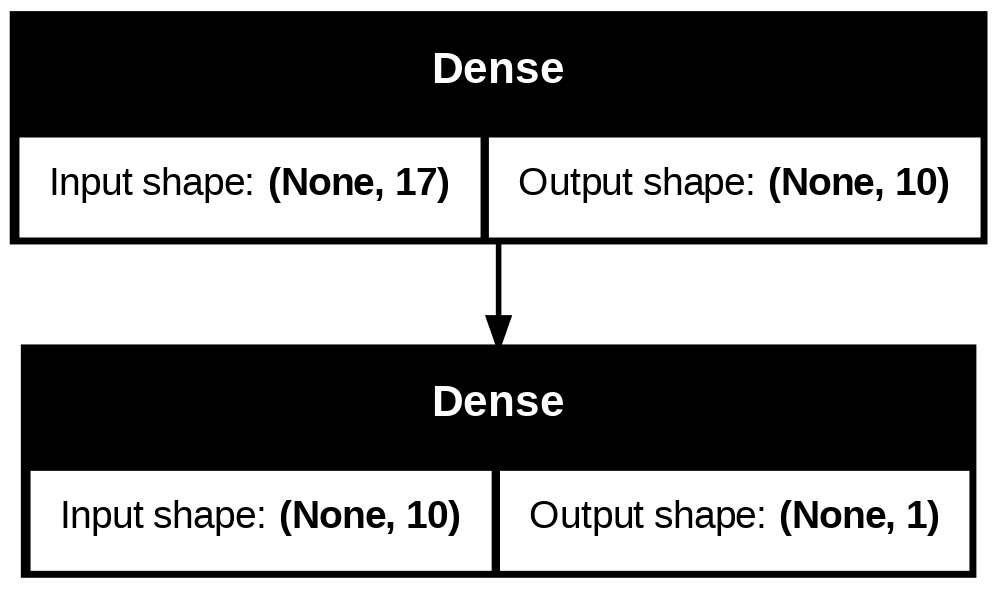

In [85]:
tf.keras.utils.plot_model(model=model_1, show_shapes=True)


regardons la structure du réseau de neurones avec des informations sur les formes des données à chaque couche

la premier couche prend en entré 17 caracteristique (symptomes) et donne en sortie 10 elements (maladies) et les 10 (maladies) sont reintroduit dans la deuxieme couche et nous avons une sortie qui est la maladie


* la première couche Dense réduit les données d'entrée de 17 caractéristiques à 10 caractéristiques
* réduit davantage les données à une seule caractéristique

en somme nous voulons une seule valeur à partir de plusieurs caractéristiques d'entrée.



Text(0.5, 0, 'epochs')

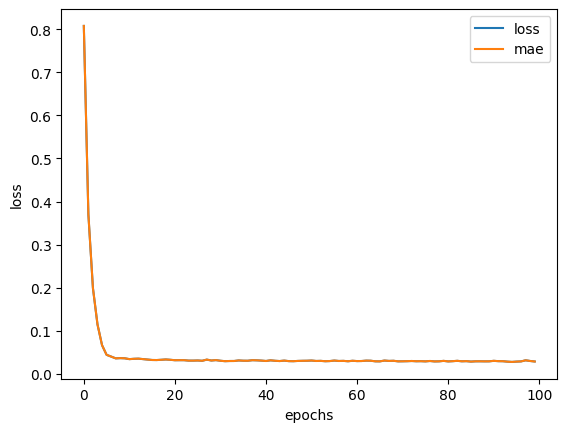

In [86]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

courbe d'évolution des pertes pendant l'entraînement de votre modèle au fil des couches

In [94]:

# Encoder les noms de maladies en nombres
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Appliquer l'encodage one-hot
onehot_encoder = OneHotEncoder(sparse=False)
y_test_onehot = onehot_encoder.fit_transform(y_test_encoded.reshape(-1, 1))

# Assurez-vous que l'encodage one-hot a été effectué avec succès
print("y_test_onehot :", y_test_onehot)

# Assurez-vous que les formes correspondent
print("Forme de y_test_onehot :", y_test_onehot.shape)

y_test_onehot : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Forme de y_test_onehot : (984, 41)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:
#evaluation de notre model
model_1.evaluate(X_test,y_test_onehot)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0285 - mae: 0.0285


[0.028560740873217583, 0.028560740873217583]

la methode evaluate nous retourne deux valeurs l'erreur et la metrics donc ici nous constactons que notre model a une perde de 0.028 alors nous pouvons dire que notre model est perfornant

code pour tester notre model